# Water quality is good if it can be drinked and is potable

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
import joblib
import pickle
import os
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
l = os.listdir()
l

['.ipynb_checkpoints',
 'Water Quality Prediction Using Machine Learning.ipynb',
 'WaterQualityData.csv']

In [3]:
df = pd.read_csv(l[2])
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [11]:
df.shape

(2011, 10)

In [12]:
# df.get(df.columns[:9])
X = df.iloc[:,:9].values #loc or df.get() even can be used
y = df['Potability'].values

In [13]:
X.shape

(2011, 9)

In [14]:
X

array([[8.31676588e+00, 2.14373394e+02, 2.20184174e+04, ...,
        1.84365245e+01, 1.00341674e+02, 4.62877054e+00],
       [9.09222346e+00, 1.81101509e+02, 1.79789863e+04, ...,
        1.15582794e+01, 3.19979927e+01, 4.07507543e+00],
       [5.58408664e+00, 1.88313324e+02, 2.87486877e+04, ...,
        8.39973464e+00, 5.49178618e+01, 2.55970823e+00],
       ...,
       [1.14910109e+01, 9.48125452e+01, 3.71888260e+04, ...,
        1.61727554e+01, 4.15585007e+01, 4.36926431e+00],
       [6.06961576e+00, 1.86659040e+02, 2.61387802e+04, ...,
        1.20676196e+01, 6.04199211e+01, 3.66971170e+00],
       [4.66810169e+00, 1.93681735e+02, 4.75809916e+04, ...,
        1.38944185e+01, 6.66876948e+01, 4.43582091e+00]])

In [15]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1838,random_state=86)

In [18]:
sts = StandardScaler()
X_train = sts.fit_transform(X_train)
X_test = sts.transform(X_test)

In [19]:
#mod = DecisionTreeClassifier(max_depth=7)
mod = SVC()

In [20]:
mod.fit(X_train, y_train)

SVC()

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, mod.predict(X_test))

0.7513513513513513

In [23]:
df['Potability'].value_counts()

0    1200
1     811
Name: Potability, dtype: int64

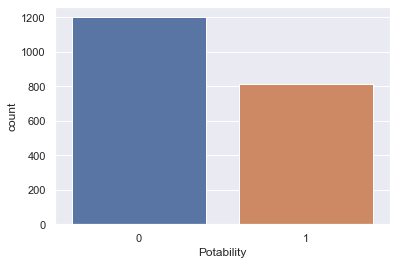

In [24]:
sns.countplot('Potability',data=df)
plt.show()

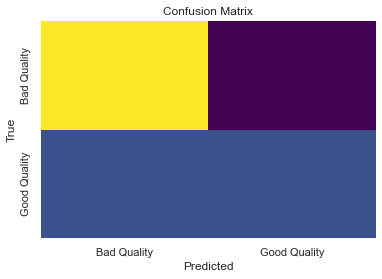

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, mod.predict(X_test))
sns.heatmap(cm, cbar=False,cmap='viridis',fmt='.lf',xticklabels=['Bad Quality','Good Quality'],yticklabels=['Bad Quality','Good Quality'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
print(cm)

[[209  23]
 [ 69  69]]
